In [3]:
import numpy as np
from scipy.signal import filtfilt
import joblib
import matplotlib.pyplot as plt

from src.files import results_dir

In [12]:
experiment_folder = results_dir("iaf_runs") / "correlated" / "20250312"
runs = list(experiment_folder.glob("*.joblib"))
out = joblib.load(runs[1])
sim = out["sim"]

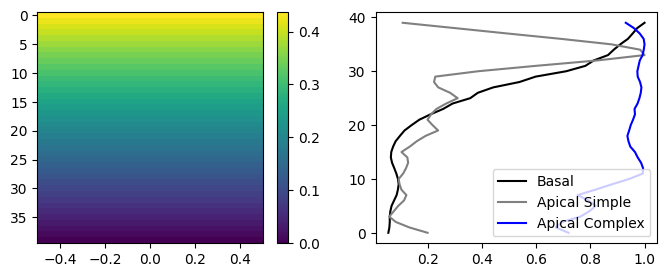

In [13]:
plt.figure(1, figsize=(8, 3))

plt.subplot(1, 2, 1)
im = plt.imshow(sim.source_populations["excitatory"].source_loading.T, aspect='auto', interpolation="none")
plt.colorbar(im)

plt.subplot(1, 2, 2)
smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"][0]["basal"][-1])
max_weight = np.max(saw)
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'black', linewidth=1.5, label="Basal")

smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"][0]["apical-simple"][-1])
max_weight = np.max(saw)
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'gray', linewidth=1.5, label="Apical Simple")

smooth_factor = round(sim.source_populations["excitatory"].num_inputs/sim.source_populations["excitatory"].num_signals/10)
kernel = np.ones(smooth_factor) / smooth_factor
saw = filtfilt(kernel, 1, out["weights"][0]["apical-complex"][-1])
max_weight = np.max(saw)
plt.plot(saw/max_weight, range(sim.source_populations["excitatory"].num_inputs-1, -1, -1), 'blue', linewidth=1.5, label="Apical Complex")

plt.legend(loc="lower right")

plt.show()

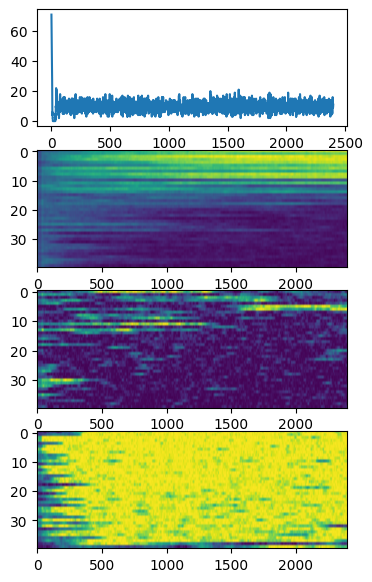

In [14]:
# Create spike train and PSTH
duration = out["weights"][0]["basal"].shape[0]

NT = int(duration / sim.dt)
dt = sim.dt
psth_window = 1  # in seconds
dpsth = round(psth_window/dt)
spikes = np.zeros(NT)
spikes[out["spike_times"][0]] = 1
psth = np.sum(spikes.reshape(-1, dpsth), axis=1)/psth_window
tvec = np.arange(NT) * dt + dt

# Create plots
plt.figure(1, figsize=(4, 7))
plt.subplot(4, 1, 1)
plt.plot(range(1, len(psth) + 1), psth)
plt.subplot(4, 1, 2)
plt.imshow(out["weights"][0]["basal"].T, aspect='auto')
plt.subplot(4, 1, 3)
plt.imshow(out["weights"][0]["apical-simple"].T, aspect='auto')
plt.subplot(4, 1, 4)
plt.imshow(out["weights"][0]["apical-complex"].T, aspect='auto')
plt.show()